In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import json
import time

import numpy as np
import tensorflow as tf
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib
label_size = 9
matplotlib.rcParams['xtick.labelsize'] = label_size
matplotlib.rcParams['ytick.labelsize'] = label_size
import matplotlib.pyplot as plt
import pandas as pd

from info_metrics import gaussian_dataset
from info_metrics.information_estimator_v2 import InformationEstimator

y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

%matplotlib inline

## Visualization in 2D

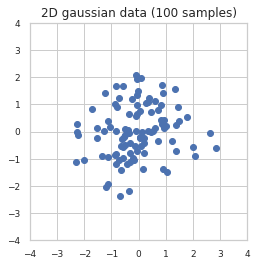

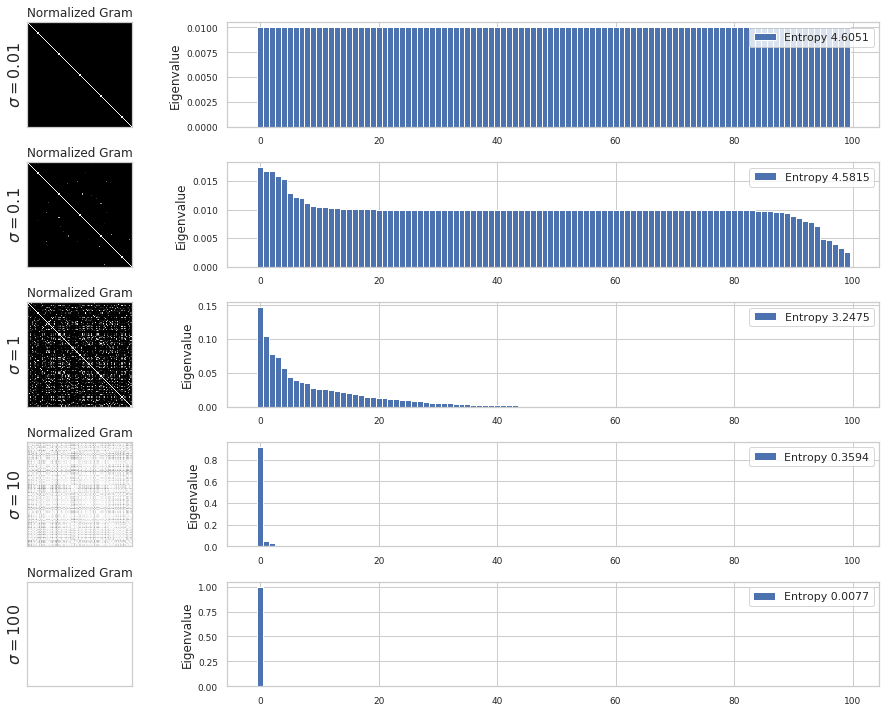

In [130]:
# Generate 2D data
n_samples = 100
corr = 0.0

mean = [0, 0]
cov = [[1, corr], [corr, 1]]  # diagonal covariance
x = np.random.multivariate_normal(mean, cov, n_samples).astype(np.float32)
plt.scatter(x[:, 0], x[:, 1])
plt.axis('square')
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.title('2D gaussian data (%d samples)' % n_samples)
plt.show()

sigma_zero_list = [0.01, 0.1, 1, 10, 100]

fig, ax = plt.subplots(
    len(sigma_zero_list), 2, 
    figsize=(13, 2*len(sigma_zero_list)), 
    gridspec_kw = {'width_ratios':[1, 3]})

# sigma_zero = 0.01
for i, sigma_zero in enumerate(sigma_zero_list):
    # Compute gram matrix
    tf.reset_default_graph()
    estimator = InformationEstimator(sigma_zero, normalize_dimension=False, normalize_scale=False)
    norm_gram = estimator.normalized_gram(x)
    with tf.Session() as sess:
        norm_gram_np = sess.run(norm_gram)

    # Compute eigenvalues
    w, _ = np.linalg.eig(norm_gram_np)
    w = np.real(w)
    w = np.clip(w, 0, None)
    w = w / w.sum()
    w = -np.sort(-w)

    entropy = np.log(np.sum(w ** 1.01)) / (1.0 - 1.01)
    # entropy = entropy / np.log(n_samples)


    # fig = plt.figure(figsize=(3, 3))
    ax[i, 0].set_title('Normalized Gram')
    ax[i, 0].imshow(norm_gram_np, vmin=0, vmax=1/n_samples, cmap='gray')
    # plt.axis('off')
    ax[i, 0].grid('off')
    ax[i, 0].set_xticks([])
    ax[i, 0].set_yticks([])
    ax[i, 0].set_ylabel('$\sigma=%s$' % sigma_zero, fontsize=16)
    # plt.show()

    # fig = plt.figure(figsize=(10, 3))
    ax[i, 1].bar(np.arange(w.size), w, 1, label='Entropy %1.4f' % (entropy))
    ax[i, 1].set_ylabel('Eigenvalue')
    # ax[i, 1].set_xlabel('Index of eigenvalue')
    # ax[i, 1].set_title('Distribution of eigenvalues (Normalized entropy %1.6f)' % (entropy))
    ax[i, 1].legend()

plt.tight_layout()
plt.show()

In [129]:
print('Saturation value (log(N)): %1.4f' % np.log(n_samples))

Saturation value (log(N)): 4.6052
